In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pylab

import seaborn as sns

import csv

import scipy
from scipy import stats
import statistics

In [2]:
%matplotlib inline
import deepdish as dd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as patches
import numpy as np
import brainiak.eventseg.event
from scipy import stats
from scipy.stats import norm, zscore, pearsonr
from scipy.signal import gaussian, convolve
from sklearn import decomposition
import seaborn as sns 
import numpy as np

In [3]:
vectorDim = 100

numNode = 1000

reps = 40 #50
kvalues = 20

# the data structures to save the means for the coherent and incoherent
coherent_means = np.empty(reps)
incoherent_means = np.empty(reps)

coherent_vars_1 = np.empty(reps)
coherent_vars_2 = np.empty(reps) 

incoherent_vars_1 = np.empty(reps)
incoherent_vars_2 = np.empty(reps) 

likelihood = np.zeros([kvalues,reps,2])



In [4]:
# now the radical loop: 1. run 2 reservoirs; 2. calculate time contst; 
# 3.sort;  4. segment (ubuntu)
# here we will just segment the sorted reservoir states

kvalues = 20
reps = 40
for res_seed in range(reps):
 
    ###################################################################
    #
    #               4. Segment
    
    string1 = '/home/peter/Downloads/data-sorted-states/data/sherlock-Sorted_states_seed%s.npy' % res_seed

    Sherlock_SortedStates = np.load(string1) 

    # get the pieces
    #Sherlock_time1=Sherlock_SortedStates[:,0:99]
    #Sherlock_time2=Sherlock_SortedStates[:,900:999]
    
    Sherlock_time1=Sherlock_SortedStates[:,100:199]
    Sherlock_time2=Sherlock_SortedStates[:,800:899]
 
    if res_seed == 0:
        Sherlock_time1_cumul = Sherlock_time1
        Sherlock_time2_cumul = Sherlock_time2
    else:
        Sherlock_time1_cumul = Sherlock_time1 + Sherlock_time1_cumul
        Sherlock_time2_cumul = Sherlock_time2 + Sherlock_time2_cumul
    
    # now test the different k values
    
    for iteration in range(kvalues):

        ###################################################################
        #
        #               4. Segment

        #simple data structure for testing

        step = 2
        # Train the two HMS with the predicted segments
        ev_time1 = brainiak.eventseg.event.EventSegment((iteration+1)*step)
        ev_time1.fit(Sherlock_time1[1000:1650,:])

        ev_time2 = brainiak.eventseg.event.EventSegment((iteration+1)*step)
        ev_time2.fit(Sherlock_time2[1000:1650,:])
        print((iteration+1)*step)

        # save the variablility scores

        coherent_ev1_var = ev_time1.event_var_
        coherent_ev2_var = ev_time2.event_var_

        # save likelihood scores
        #likelihood[iteration, res_seed,0] = ev_time1.ll_[len(ev_time1.ll_)-1]
        #likelihood[iteration, res_seed,1] = ev_time2.ll_[len(ev_time2.ll_)-1]
        a,likelihood[iteration, res_seed,0] = ev_time1.find_events(Sherlock_time1)
        a,likelihood[iteration, res_seed,1] = ev_time2.find_events(Sherlock_time2)


        print("res_seed = ", res_seed)
        print("Likelihood")
        print(*likelihood[iteration, res_seed,:], sep='\n')


2
res_seed =  0
Likelihood
-4395.073194533397
-4609.3654905424355
4
res_seed =  0
Likelihood
-4580.8546393200695
-4598.180826794006
6
res_seed =  0
Likelihood
-4778.014970348062
-4843.810538455336
8
res_seed =  0
Likelihood
-4752.545377615265
-5122.158778647757
10
res_seed =  0
Likelihood
-4731.027948785148
-5263.900105561035
12
res_seed =  0
Likelihood
-4998.434933619783
-5674.593550791492
14
res_seed =  0
Likelihood
-5395.525302678111
-5994.207196966039
16
res_seed =  0
Likelihood
-5828.861247660184
-6430.899453858385
18
res_seed =  0
Likelihood
-6183.198292948846
-6769.105197286606
20
res_seed =  0
Likelihood
-6513.252887973694
-6374.204702469298
22
res_seed =  0
Likelihood
-6772.127772826112
-6635.853471701987
24
res_seed =  0
Likelihood
-7167.021147839304
-7016.3480559091795
26
res_seed =  0
Likelihood
-7393.338399455325
-7330.582401128004
28
res_seed =  0
Likelihood
-7414.0821212909805
-7668.810538917937
30
res_seed =  0
Likelihood
-8345.913690607593
-7913.011421565216
32
res_see

12
res_seed =  6
Likelihood
-5515.615869167349
-6118.379867869431
14
res_seed =  6
Likelihood
-5733.847835614009
-6423.023757096872
16
res_seed =  6
Likelihood
-6004.347192537704
-6900.590543190526
18
res_seed =  6
Likelihood
-6380.2108566993
-7196.305802696091
20
res_seed =  6
Likelihood
-6723.858599808875
-7512.809747957304
22
res_seed =  6
Likelihood
-7008.305948603902
-7974.684831424542
24
res_seed =  6
Likelihood
-7420.263836906912
-8365.628017772193
26
res_seed =  6
Likelihood
-7647.0723473927455
-8781.000460898164
28
res_seed =  6
Likelihood
-7974.819705101119
-9227.049046627764
30
res_seed =  6
Likelihood
-8235.461000799745
-9712.03061869827
32
res_seed =  6
Likelihood
-8871.19243516312
-9861.378295000195
34
res_seed =  6
Likelihood
-9176.041461227887
-10389.171564516988
36
res_seed =  6
Likelihood
-9472.513773446279
-10575.83847290721
38
res_seed =  6
Likelihood
-9805.526324431474
-10585.509901626903
40
res_seed =  6
Likelihood
-10322.54855035769
-10966.108075102626
2
res_seed

20
res_seed =  12
Likelihood
-6029.193917658207
-6828.326597601732
22
res_seed =  12
Likelihood
-6276.859932037547
-7436.022851680108
24
res_seed =  12
Likelihood
-6537.878418268543
-7889.527884709998
26
res_seed =  12
Likelihood
-6925.603381578381
-8265.544273907819
28
res_seed =  12
Likelihood
-7141.335275001762
-8811.911905416797
30
res_seed =  12
Likelihood
-7470.3264134505835
-9257.449187522834
32
res_seed =  12
Likelihood
-7825.001967450172
-9290.420314591101
34
res_seed =  12
Likelihood
-8207.08442071203
-9609.342098080318
36
res_seed =  12
Likelihood
-8356.397907461605
-10217.222529327848
38
res_seed =  12
Likelihood
-8636.968557998245
-10582.047288304439
40
res_seed =  12
Likelihood
-8935.777410267403
-10963.206946742232
2
res_seed =  13
Likelihood
-4707.384294960141
-4421.802783365943
4
res_seed =  13
Likelihood
-4907.2474105750425
-4729.1302476042865
6
res_seed =  13
Likelihood
-5144.340194315606
-4141.905201379656
8
res_seed =  13
Likelihood
-5505.849456231523
-4477.4605012

26
res_seed =  18
Likelihood
-8169.003708693525
-7483.204098946149
28
res_seed =  18
Likelihood
-8908.558799508177
-7929.8329282192535
30
res_seed =  18
Likelihood
-9351.229833530819
-7824.367321685893
32
res_seed =  18
Likelihood
-9935.168234850515
-8939.093818619473
34
res_seed =  18
Likelihood
-10110.951457158379
-9245.00247396877
36
res_seed =  18
Likelihood
-10461.405749548927
-9265.158483829022
38
res_seed =  18
Likelihood
-10755.931995612294
-9430.30321993892
40
res_seed =  18
Likelihood
-11138.37982183571
-9921.414438204243
2
res_seed =  19
Likelihood
-4571.042623629992
-4374.518885446043
4
res_seed =  19
Likelihood
-4720.126106279358
-4321.715719407183
6
res_seed =  19
Likelihood
-5002.882825721256
-4553.4136767861355
8
res_seed =  19
Likelihood
-5341.616219304024
-4862.704006861233
10
res_seed =  19
Likelihood
-5690.211055699982
-5135.967629577469
12
res_seed =  19
Likelihood
-6060.147327712591
-5643.777683316348
14
res_seed =  19
Likelihood
-6473.930186081802
-5744.236238565

32
res_seed =  24
Likelihood
-8290.42056974605
-7379.912442729879
34
res_seed =  24
Likelihood
-8561.304692874513
-7506.805875424285
36
res_seed =  24
Likelihood
-8820.317280348258
-7750.965469901691
38
res_seed =  24
Likelihood
-8990.06880717105
-8137.702497863046
40
res_seed =  24
Likelihood
-9457.146712771315
-8414.299283968481
2
res_seed =  25
Likelihood
-4448.211999338675
-4607.038237353607
4
res_seed =  25
Likelihood
-4647.910120639243
-4661.085538763628
6
res_seed =  25
Likelihood
-4912.420491157623
-4927.851213765442
8
res_seed =  25
Likelihood
-5302.646301274123
-5006.598954906172
10
res_seed =  25
Likelihood
-5613.8691527964975
-5331.718383601758
12
res_seed =  25
Likelihood
-5853.4604154978015
-5461.9529887155895
14
res_seed =  25
Likelihood
-6318.817226690911
-5805.181818036056
16
res_seed =  25
Likelihood
-6716.054924965071
-6219.405753432156
18
res_seed =  25
Likelihood
-7082.493035289638
-6622.61616838558
20
res_seed =  25
Likelihood
-6906.695309059371
-6873.492126014388

38
res_seed =  30
Likelihood
-11216.46368919019
-10932.568502014621
40
res_seed =  30
Likelihood
-11616.437796283397
-11311.976640704252
2
res_seed =  31
Likelihood
-4372.623816080188
-4703.1079397399135
4
res_seed =  31
Likelihood
-4421.827815246631
-4420.450937964656
6
res_seed =  31
Likelihood
-4575.817735241344
-4731.22687792497
8
res_seed =  31
Likelihood
-4863.981893622952
-4972.573949305968
10
res_seed =  31
Likelihood
-5140.421685363276
-5254.0990793038245
12
res_seed =  31
Likelihood
-5428.295996032915
-5619.791388366302
14
res_seed =  31
Likelihood
-5280.779926122302
-6229.324409486292
16
res_seed =  31
Likelihood
-5817.499442186788
-6612.643067784808
18
res_seed =  31
Likelihood
-6033.237628555035
-6880.660708886316
20
res_seed =  31
Likelihood
-6347.157975009287
-7164.753469229254
22
res_seed =  31
Likelihood
-6603.736193546599
-7471.929636418445
24
res_seed =  31
Likelihood
-6977.835866768582
-7927.521303377251
26
res_seed =  31
Likelihood
-7285.898064851441
-8432.54884366

4
res_seed =  37
Likelihood
-4382.582878544222
-4874.440503272021
6
res_seed =  37
Likelihood
-4578.155408552605
-5226.358028426874
8
res_seed =  37
Likelihood
-4913.8020922420865
-5578.022678528256
10
res_seed =  37
Likelihood
-5211.604480448151
-6077.177471869275
12
res_seed =  37
Likelihood
-5513.581325464185
-6459.85987075314
14
res_seed =  37
Likelihood
-5922.536259774374
-6889.3150128427005
16
res_seed =  37
Likelihood
-5891.429452660574
-7347.2098695551795
18
res_seed =  37
Likelihood
-6187.227249186035
-7769.5189255103205
20
res_seed =  37
Likelihood
-6513.4629702899565
-8054.448903306505
22
res_seed =  37
Likelihood
-6786.307508500948
-8483.49224910899
24
res_seed =  37
Likelihood
-7079.304201379613
-9016.902012888924
26
res_seed =  37
Likelihood
-7394.510801981088
-9436.243163943605
28
res_seed =  37
Likelihood
-7460.799532691037
-9712.92135345772
30
res_seed =  37
Likelihood
-7810.792734055454
-10206.174948390888
32
res_seed =  37
Likelihood
-8156.915133394011
-10753.8274367

In [5]:
#for the figure get the mean reservoir states
Sherlock_time1_last = Sherlock_time1
Sherlock_time2_last = Sherlock_time2

np.save('Sherlock-time1-last-june10.npy', Sherlock_time1) 
np.save('Sherlock-time2-last-june10.npy', Sherlock_time2) 



In [6]:
Sherlock_time1 = np.load('Sherlock-time1-last-june10.npy') 
Sherlock_time2 = np.load('Sherlock-time2-last-june10.npy') 


In [7]:
Sherlock_time1 = Sherlock_time1_cumul/reps
Sherlock_time2 = Sherlock_time2_cumul/reps

In [8]:
#save the data likelihood
np.save('Sherlock-time1-june10.npy', Sherlock_time1) 
np.save('Sherlock-time2-june10.npy', Sherlock_time2) 

np.save('likelihood-june10.npy', likelihood) 

In [9]:
Sherlock_time1 = Sherlock_time1_last
Sherlock_time2 = Sherlock_time2_last

In [10]:
# sement and make figure

ev_time1 = brainiak.eventseg.event.EventSegment(22)
ev_time1.fit(Sherlock_time1[1000:1650,:])

ev_time2 = brainiak.eventseg.event.EventSegment(8)
ev_time2.fit(Sherlock_time2[1000:1650,:])


for j in range(99):
    mean = Sherlock_time1[:,j].mean()
    if abs(mean) > 0.01: #WAS .01
        Sherlock_time1[:,j] = Sherlock_time1[:,j]/mean

for j in range(99):
    mean = Sherlock_time2[:,j].mean()
    if abs(mean) > 0.01:
        Sherlock_time2[:,j] = Sherlock_time2[:,j]/mean

#save the data likelihood
#np.save('Sherlock-time1-june6.npy', Sherlock_time1) 
#np.save('Sherlock-time2-june6.npy', Sherlock_time2) 

#np.save('likelihood-june6.npy', likelihood) 

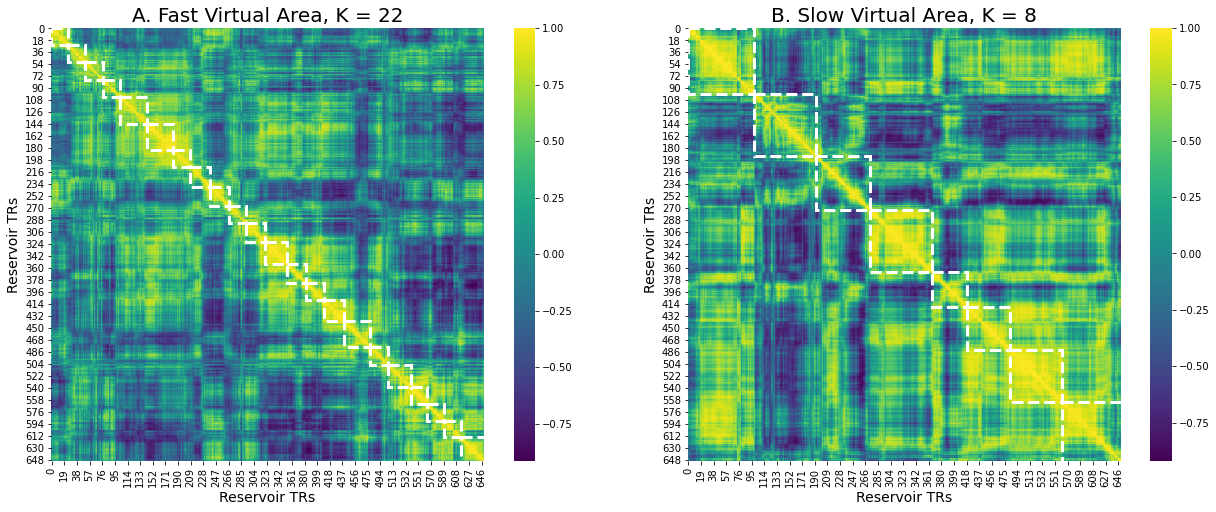

In [11]:
# 3 display the segmentation
color='viridis'
ec='white'
scale=0.9
lw=3

fs1 = 14
fs2 = 20

nTR=682
fig=plt.figure(figsize=(18, 7))

fig.add_subplot(121)
bounds = np.where(np.diff(np.argmax(ev_time1.segments_[0], axis=1)))[0]

#plt.imshow(np.corrcoef(Sherlock_time1),cmap=color, vmin=scale, vmax=1)
#plt.imshow(np.corrcoef(Sherlock_time1),cmap=color)
sns.heatmap(np.corrcoef(Sherlock_time1[1000:1650,:]), cmap = 'viridis',square=True)

ax = plt.gca()
bounds_aug = np.concatenate(([0],bounds,[nTR]))
for i in range(len(bounds_aug)-1):
    rect = patches.Rectangle((bounds_aug[i],bounds_aug[i]),bounds_aug[i+1]-bounds_aug[i],bounds_aug[i+1]-bounds_aug[i],linewidth=lw, linestyle='--',edgecolor=ec,facecolor='none')
    ax.add_patch(rect)

plt.xlabel('Reservoir TRs', fontsize = fs1)
plt.ylabel('Reservoir TRs', fontsize = fs1)

plt.title('A. Fast Virtual Area, K = 22', fontsize = fs2)

fig.add_subplot(122)
bounds = np.where(np.diff(np.argmax(ev_time2.segments_[0], axis=1)))[0]

#plt.imshow(np.corrcoef(Sherlock_time2),cmap=color, vmin=scale, vmax=1)
#plt.imshow(np.corrcoef(Sherlock_time2),cmap=color)
sns.heatmap(np.corrcoef(Sherlock_time2[1000:1650,:]), cmap = 'viridis',square=True)

ax = plt.gca()
bounds_aug = np.concatenate(([0],bounds,[nTR]))
for i in range(len(bounds_aug)-1):
    rect = patches.Rectangle((bounds_aug[i],bounds_aug[i]),bounds_aug[i+1]-bounds_aug[i],bounds_aug[i+1]-bounds_aug[i],linewidth=lw, linestyle='--',edgecolor=ec,facecolor='none')
    ax.add_patch(rect)

plt.xlabel('Reservoir TRs', fontsize = fs1)
plt.ylabel('Reservoir TRs', fontsize = fs1)

plt.title('B. Slow Virtual Area, K = 8', fontsize = fs2)


fig.tight_layout()
plt.savefig('Exp4-june10.png')

In [12]:
tmatrix=np.zeros([kvalues,kvalues])
pmatrix=np.zeros([kvalues,kvalues])
dmatrix=np.zeros([kvalues,kvalues])
                  

In [13]:
#likelihood = np.zeros([kvalues,reps,fastslow])
# compare all k pairs to see if the p values are significant

for j in range(kvalues):
    for i in range(j):
        # when i < j
        anti = (likelihood[i,:,0]+ likelihood[j,:,1])/2 # small k with fast area + large k with slow area 
        pro = (likelihood[j,:,0]+ likelihood[i,:,1])/2  # large k with fast area + small k with slow area
        dmatrix[i,j]=np.mean(pro-anti)
        t,p = stats.ttest_rel(pro,anti)
        tmatrix[i,j]=t
        pmatrix[i,j]=p
        #if t > 0 and p< 0.01:
        if p<0.01:
            print(i,j,t,p)


1 5 2.7916614827091752 0.008078894385358424
2 5 3.0548547269264232 0.004047877564508091
3 5 3.584887037214125 0.000926041521257619
4 5 4.055318237979933 0.00023202400021133556
3 6 2.763590014727373 0.008680928397423146
4 6 2.7373961705380028 0.009279999230730347
2 10 2.7285021588794103 0.009491974274015824
3 10 2.777004998670498 0.008388208167267434
1 11 2.777931774244494 0.008368327973179015
2 11 3.059799755034893 0.00399452142038592
3 11 3.1411779060535916 0.003206346993285191
4 11 3.0620300084919343 0.003970674887392664
7 11 2.980290840781758 0.004938347498094001
9 11 2.8993958659718007 0.006110824598587664
1 12 2.8823481689209483 0.006389073366231728
2 12 3.1166671171547717 0.0034267552737749767
3 12 3.1869694366044943 0.002830048108667149
4 12 3.0416238831615754 0.004193958486646131
7 12 2.847997654445119 0.006986053818621101
9 12 2.803804992412209 0.007830682786866909
1 13 2.9942716470747768 0.004758474050634393
2 13 3.236005930790234 0.00247367975015447
3 13 3.3061371202313024 0

(20, 20)
49
0.017533556513720183
0.05155588112071955


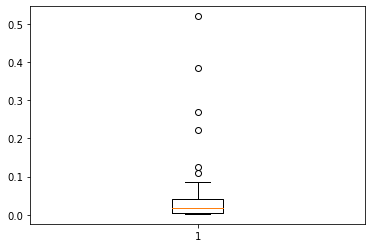

In [14]:
print(pmatrix.shape)

pmeans=np.zeros([50])
#likelihood = np.zeros([kvalues,reps,fastslow])
# compare all k pairs to see if the p values are significant

count=0
for i in range(3,8):
    for j in range(9,19):
        #print(i,j,pmatrix[i,j],count)
        pmeans[count]=pmatrix[i,j]
        count=count+1
print(count-1)
print(statistics.median(pmeans))
print(statistics.mean(pmeans))
plt.boxplot(pmeans)
plt.show()

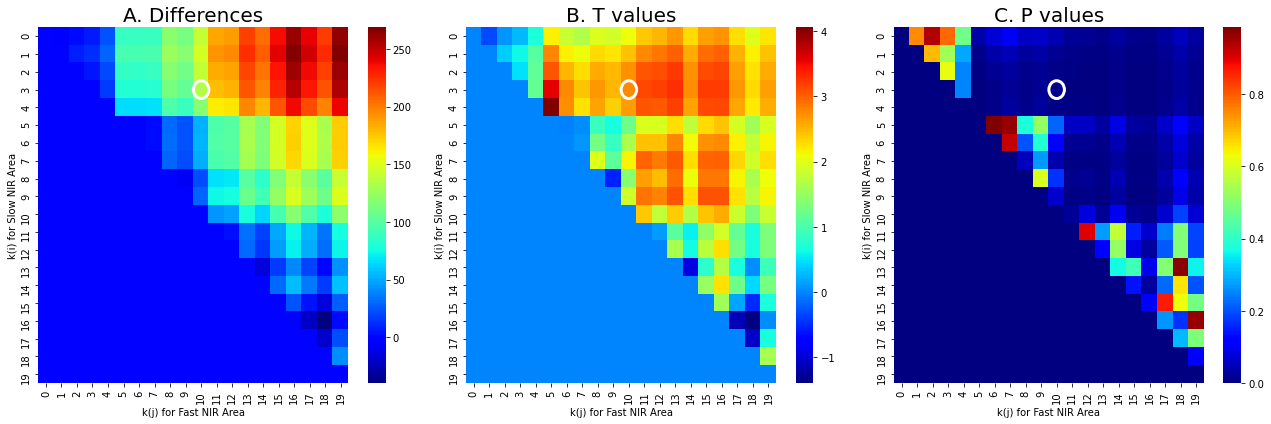

In [15]:
# 3 display the segmentation
color='jet'
ec='black'
scale=0.9
lw=2

fs1 = 14
fs2 = 20



fig=plt.figure(figsize=(18, 6))

fig.add_subplot(131)
ax = fig.gca()
circle2 = plt.Circle((10.5, 3.5), 0.5, color='w', fill=False,  lw=3)
ax.add_patch(circle2)
sns.heatmap(dmatrix, cmap=color)
plt.title('A. Differences', fontsize = fs2)
ax.set_xlabel('k(j) for Fast NIR Area')
ax.set_ylabel('k(i) for Slow NIR Area')

fig.add_subplot(132)
ax = fig.gca()
circle2 = plt.Circle((10.5, 3.5), 0.5, color='w', fill=False,  lw=3)
ax.add_patch(circle2)
sns.heatmap(tmatrix, cmap=color)
plt.title('B. T values', fontsize = fs2)
ax.set_xlabel('k(j) for Fast NIR Area')
ax.set_ylabel('k(i) for Slow NIR Area')

fig.add_subplot(133)
ax = fig.gca()
circle2 = plt.Circle((10.5, 3.5), 0.5, color='w', fill=False,  lw=3)
ax.add_patch(circle2)
sns.heatmap(pmatrix, cmap=color)
plt.title('C. P values', fontsize = fs2)
ax.set_xlabel('k(j) for Fast NIR Area')
ax.set_ylabel('k(i) for Slow NIR Area')

fig.tight_layout()
plt.savefig('likelihoodk-areas-no-norm.png')

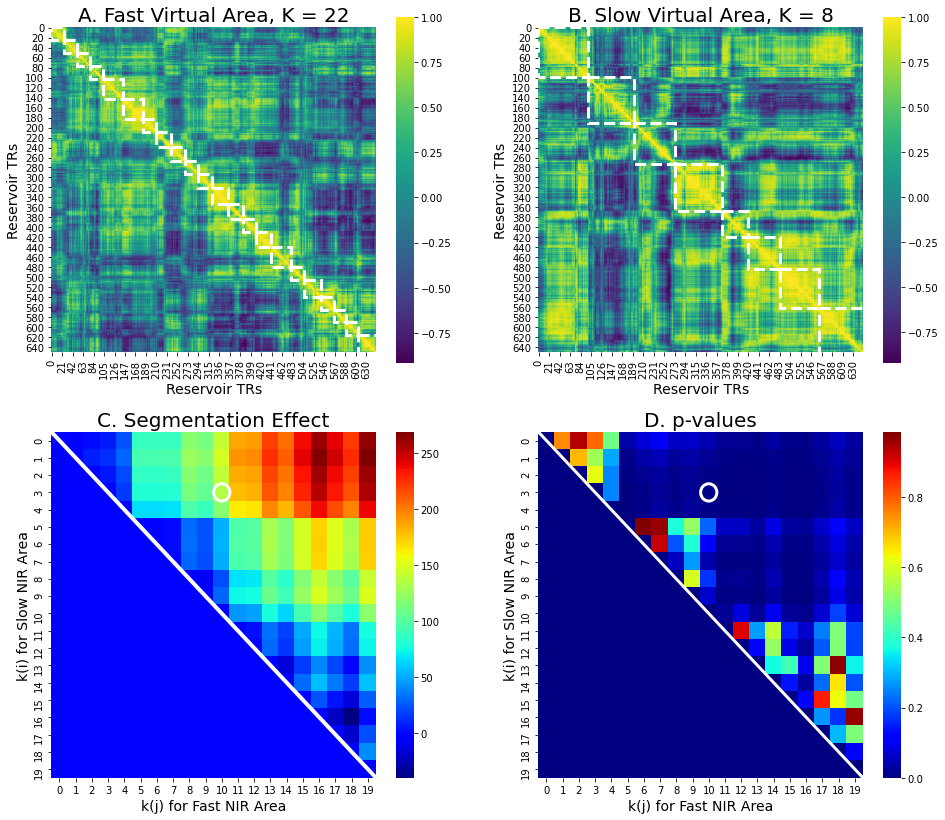

In [16]:
#new figure with the example and then the grid search
# display the segmentation
color='viridis'
ec='white'
scale=0.9
lw=3

fs1 = 14
fs2 = 20

nTR=682
fig=plt.figure(figsize=(16, 14))

fig.add_subplot(221)
bounds = np.where(np.diff(np.argmax(ev_time1.segments_[0], axis=1)))[0]

#plt.imshow(np.corrcoef(Sherlock_time1),cmap=color, vmin=scale, vmax=1)
#plt.imshow(np.corrcoef(Sherlock_time1),cmap=color)
sns.heatmap(np.corrcoef(Sherlock_time1[1000:1650,:]), cmap = 'viridis',square=True)

ax = plt.gca()
bounds_aug = np.concatenate(([0],bounds,[nTR]))
for i in range(len(bounds_aug)-1):
    rect = patches.Rectangle((bounds_aug[i],bounds_aug[i]),bounds_aug[i+1]-bounds_aug[i],bounds_aug[i+1]-bounds_aug[i],linewidth=lw, linestyle='--',edgecolor=ec,facecolor='none')
    ax.add_patch(rect)

plt.xlabel('Reservoir TRs', fontsize = fs1)
plt.ylabel('Reservoir TRs', fontsize = fs1)

plt.title('A. Fast Virtual Area, K = 22', fontsize = fs2)

fig.add_subplot(222)
bounds = np.where(np.diff(np.argmax(ev_time2.segments_[0], axis=1)))[0]

#plt.imshow(np.corrcoef(Sherlock_time2),cmap=color, vmin=scale, vmax=1)
#plt.imshow(np.corrcoef(Sherlock_time2),cmap=color)
sns.heatmap(np.corrcoef(Sherlock_time2[1000:1650,:]), cmap = 'viridis',square=True)

ax = plt.gca()
bounds_aug = np.concatenate(([0],bounds,[nTR]))
for i in range(len(bounds_aug)-1):
    rect = patches.Rectangle((bounds_aug[i],bounds_aug[i]),bounds_aug[i+1]-bounds_aug[i],bounds_aug[i+1]-bounds_aug[i],linewidth=lw, linestyle='--',edgecolor=ec,facecolor='none')
    ax.add_patch(rect)

plt.xlabel('Reservoir TRs', fontsize = fs1)
plt.ylabel('Reservoir TRs', fontsize = fs1)

plt.title('B. Slow Virtual Area, K = 8', fontsize = fs2)

##########################
color = 'jet'
fig.add_subplot(223)
ax = fig.gca()
circle2 = plt.Circle((10.5, 3.5), 0.5, color='w', fill=False,  lw=3)
ax.add_patch(circle2)
sns.heatmap(dmatrix, cmap=color)
plt.title('C. Segmentation Effect', fontsize = fs2)
ax.set_xlabel('k(j) for Fast NIR Area', fontsize = fs1)
ax.set_ylabel('k(i) for Slow NIR Area', fontsize = fs1)
ax.plot([1,0], [0,1], transform=ax.transAxes, color='w', lw=4)



fig.add_subplot(224)
ax = fig.gca()
circle2 = plt.Circle((10.5, 3.5), 0.5, color='w', fill=False,  lw=3)
ax.add_patch(circle2)
sns.heatmap(pmatrix, cmap=color)
plt.title('D. p-values', fontsize = fs2)
ax.set_xlabel('k(j) for Fast NIR Area', fontsize = fs1)
ax.set_ylabel('k(i) for Slow NIR Area', fontsize = fs1)
ax.plot([1,0], [0,1], transform=ax.transAxes, color='w',lw=3)




#fig.tight_layout()
plt.savefig('F10-Exp4-sherlock.png', dpi=600)


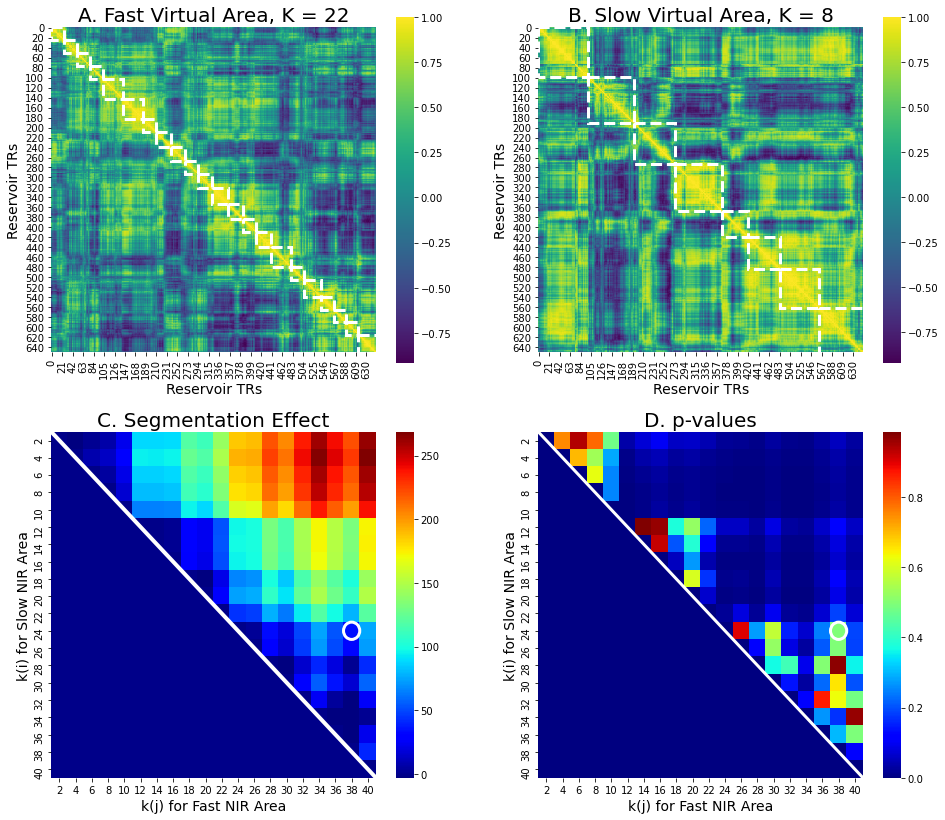

In [17]:
#new figure with the example and then the grid search
# display the segmentation
color='viridis'
ec='white'
scale=0.9
lw=3

fs1 = 14
fs2 = 20

nTR=682
fig=plt.figure(figsize=(16, 14))

fig.add_subplot(221)
bounds = np.where(np.diff(np.argmax(ev_time1.segments_[0], axis=1)))[0]

#plt.imshow(np.corrcoef(Sherlock_time1),cmap=color, vmin=scale, vmax=1)
#plt.imshow(np.corrcoef(Sherlock_time1),cmap=color)
sns.heatmap(np.corrcoef(Sherlock_time1[1000:1650,:]), cmap = 'viridis',square=True)

ax = plt.gca()
bounds_aug = np.concatenate(([0],bounds,[nTR]))
for i in range(len(bounds_aug)-1):
    rect = patches.Rectangle((bounds_aug[i],bounds_aug[i]),bounds_aug[i+1]-bounds_aug[i],bounds_aug[i+1]-bounds_aug[i],linewidth=lw, linestyle='--',edgecolor=ec,facecolor='none')
    ax.add_patch(rect)

plt.xlabel('Reservoir TRs', fontsize = fs1)
plt.ylabel('Reservoir TRs', fontsize = fs1)

plt.title('A. Fast Virtual Area, K = 22', fontsize = fs2)

fig.add_subplot(222)
bounds = np.where(np.diff(np.argmax(ev_time2.segments_[0], axis=1)))[0]

#plt.imshow(np.corrcoef(Sherlock_time2),cmap=color, vmin=scale, vmax=1)
#plt.imshow(np.corrcoef(Sherlock_time2),cmap=color)
sns.heatmap(np.corrcoef(Sherlock_time2[1000:1650,:]), cmap = 'viridis',square=True)

ax = plt.gca()
bounds_aug = np.concatenate(([0],bounds,[nTR]))
for i in range(len(bounds_aug)-1):
    rect = patches.Rectangle((bounds_aug[i],bounds_aug[i]),bounds_aug[i+1]-bounds_aug[i],bounds_aug[i+1]-bounds_aug[i],linewidth=lw, linestyle='--',edgecolor=ec,facecolor='none')
    ax.add_patch(rect)

plt.xlabel('Reservoir TRs', fontsize = fs1)
plt.ylabel('Reservoir TRs', fontsize = fs1)

plt.title('B. Slow Virtual Area, K = 8', fontsize = fs2)

##########################

A1 = np.linspace(2,40,20, dtype=int)
A2 = np.linspace(2,40,20, dtype=int)

color = 'jet'
fig.add_subplot(223)
ax = fig.gca()
circle2 = plt.Circle((18.5, 11.5), 0.5, color='w', fill=False,  lw=3)
ax.add_patch(circle2)
sns.heatmap(dmatrix, cmap=color, xticklabels=A1, yticklabels=A2,vmin=-3)
plt.title('C. Segmentation Effect', fontsize = fs2)
ax.set_xlabel('k(j) for Fast NIR Area', fontsize = fs1)
ax.set_ylabel('k(i) for Slow NIR Area', fontsize = fs1)
ax.plot([1,0], [0,1], transform=ax.transAxes, color='w', lw=4)



fig.add_subplot(224)
ax = fig.gca()
circle2 = plt.Circle((18.5, 11.5), 0.5, color='w', fill=False,  lw=3)
ax.add_patch(circle2)
sns.heatmap(pmatrix, cmap=color, xticklabels=A1, yticklabels=A2)
plt.title('D. p-values', fontsize = fs2)
ax.set_xlabel('k(j) for Fast NIR Area', fontsize = fs1)
ax.set_ylabel('k(i) for Slow NIR Area', fontsize = fs1)
ax.plot([1,0], [0,1], transform=ax.transAxes, color='w',lw=3)




#fig.tight_layout()
plt.savefig('F10-Exp4-sherlock.png', dpi=600)


Text(0, 0.5, 'Log likelihood difference')

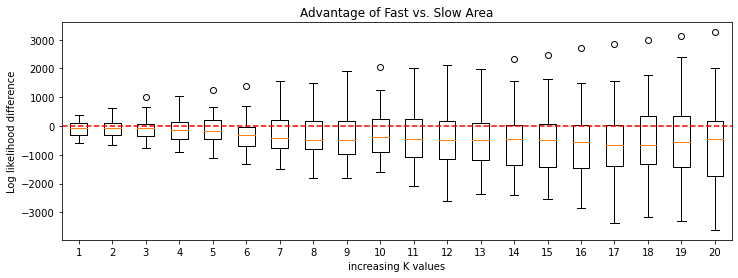

In [18]:
#likelihood = np.zeros([kvalues,reps,fastslow])
# small K is slow, likelihood 1 is slow
# high K is fast, likelihood 0 is fast

#model k
#slow slow - fast slow
#slow fast - fast fast


f, ax = plt.subplots(1,1, figsize=(12, 4))

ax.boxplot(likelihood[:,:,1].T-likelihood[:,:,0].T)
#ax.boxplot(likelihood[:,:,0].T)
#ax.boxplot(likelihood[:,:,1].T)
#ax.boxplot(likelihood)
#ax.plot(likelihood[:,1])

plt.axhline(y=0, color='r', linestyle='--')


ax.set_title('Advantage of Fast vs. Slow Area')
ax.set_xlabel('increasing K values')
ax.set_ylabel('Log likelihood difference')
#
#sns.despine()

(array([ 2.,  0.,  5.,  6., 12.,  3.,  6.,  3.,  2.,  1.]),
 array([-7227.73074778, -7052.85313583, -6877.97552387, -6703.09791192,
        -6528.22029996, -6353.34268801, -6178.46507605, -6003.5874641 ,
        -5828.70985214, -5653.83224019, -5478.95462823]),
 <BarContainer object of 10 artists>)

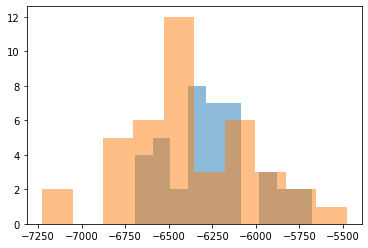

In [19]:
data3 = (likelihood[3,:,0]+ likelihood[10,:,1])/2
data4 = (likelihood[10,:,0]+ likelihood[3,:,1])/2

plt.hist(data4, alpha=0.5)
plt.hist(data3,alpha=0.5)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3c211eae10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3c211f16d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3c2125c0d0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f3c211f1f90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f3c211fe410>,
 'means': []}

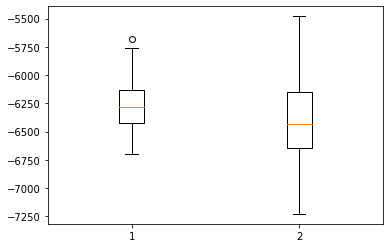

In [20]:
plt.boxplot([data4,data3])

In [21]:
#4 15 4.307048321216739 7.923701639107483e-05
t,p = stats.ttest_rel(data4,data3)
print(t)
print(p)
print(np.mean(data4-data3))

2.777004998670498
0.008388208167267434
134.7257302954369


In [22]:
print(np.shape(likelihood))
print(kvalues)

(20, 40, 2)
20


<AxesSubplot:>

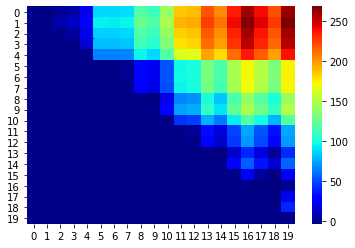

In [23]:
sns.heatmap(dmatrix,cmap='jet',vmin=-3)

In [24]:
print(dmatrix[11,13:20])
print(pmatrix[11,13:20])      

[33.66801007 18.43326178 49.66881835 74.58744856 53.74471538 34.91883747
 76.24625239]
[0.27445278 0.57422156 0.15230745 0.0665952  0.24559298 0.4995111
 0.1901757 ]


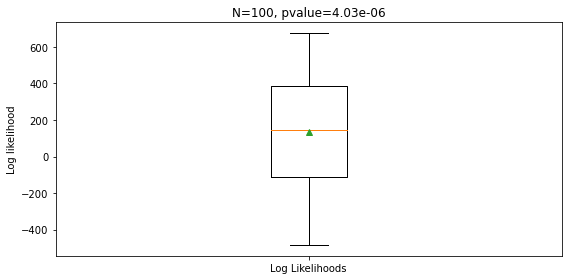

In [25]:

fig=plt.figure(figsize=(8, 4))
#f,ax = plt.subplots(1,1, figsize=(5, 5))
plt.boxplot(data4-data3,showmeans=True)
#plt.xlabel('Coherent                                    Incoherent')
plt.ylabel('Log likelihood')
#plt.axhline(y=0, color='r', linestyle='--')

plt.xticks([1], ['Log Likelihoods'])#ax.set_xticklabels(['Coherent-Incoherent'])
plt.title('N=100, pvalue=4.03e-06')
fig.tight_layout()
plt.savefig('temp2.png')

IndexError: index 25 is out of bounds for axis 0 with size 20

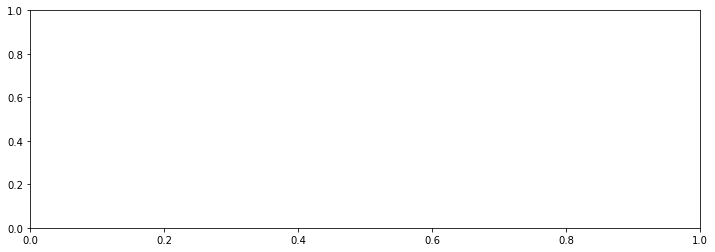

In [26]:
f, ax = plt.subplots(1,1, figsize=(12, 4))

ax.plot(likelihood[4,:,0]-likelihood[25,:,1])
#ax.boxplot(likelihood)
#ax.plot(likelihood[:,1])

plt.axhline(y=0, color='r', linestyle='--')


ax.set_title('Advantage of Fast vs. Slow Area')
ax.set_xlabel('increasing K values')
ax.set_ylabel('Log likelihood difference')
#
#sns.despine()

In [ ]:
likelihood = np.load('likelihood-june10.npy')

In [ ]:
#np.save('Sherlock-time1-june6.npy', Sherlock_time1) 
#np.save('Sherlock-time2-june6.npy', Sherlock_time2) 

#np.save('likelihood-june6.npy', likelihood) 

Sherlock_time1 = np.load('Sherlock-time1-last-june10.npy')
Sherlock_time2 = np.load('Sherlock-time2-last-june10.npy')

In [ ]:
Sherlock_time1 = np.load('Sherlock-time1-june10.npy')
Sherlock_time2 = np.load('Sherlock-time2-june10.npy')

In [ ]:
ev_time1 = brainiak.eventseg.event.EventSegment(88)
ev_time1.fit(Sherlock_time1)

ev_time2 = brainiak.eventseg.event.EventSegment(32)
ev_time2.fit(Sherlock_time2)
print((iteration+1)*step)

# save the variablility scores

coherent_ev1_var = ev_time1.event_var_
coherent_ev2_var = ev_time2.event_var_

# save likelihood scores
print(ev_time1.ll_[len(ev_time1.ll_)-1])
print(ev_time2.ll_[len(ev_time2.ll_)-1])


